In [28]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [29]:
data = load_iris()

In [30]:
x = data.data[:,1:3]
y = data.target

In [31]:
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def split_data(x,y,dim,value):
    v_left = x[:,dim] <= value
    v_right = x[:,dim] >= value
    return x[v_left], y[v_left], x[v_right], y[v_right]
def gini(p):
    return 1 - p**2 - (1 - p)**2

def cal_entropy(y):
    sum_ent = 0
    count = Counter(y)
    for i in count:
        p = count[i] / len(y)
        sum_ent +=(- p*np.log2(p))
    return sum_ent

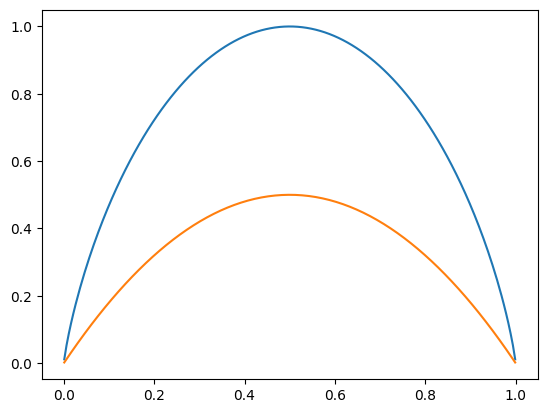

In [32]:
plot_x = np.linspace(0.001,0.999,200)
plt.plot(plot_x, entropy(plot_x), label='entropy')
plt.plot(plot_x, gini(plot_x), label='cal entropy')

In [33]:
cal_entropy(y)

np.float64(1.584962500721156)

In [34]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(x,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[1] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 4.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.154\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.497\nsamples = 55\nvalue = [0, 6, 49]')]

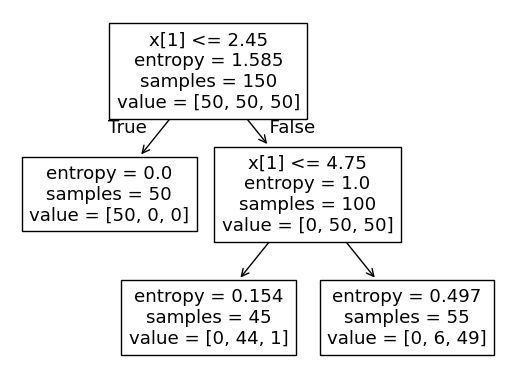

In [35]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [36]:
def find_best_split(x,y):
    best_dim = -1
    best_value = -np.inf
    best_entropy = np.inf
    best_left = None
    best_right = None
    for dim in range(x.shape[1]):
        sorted_index = np.argsort(x[:,dim])
        for i in range(x.shape[0]-1):
            v_left, v_right = x[sorted_index[i],dim], x[sorted_index[i+1],dim]
            if v_left != v_right:
                value = (v_left+v_right)/2
                x_left, y_left, x_right, y_right = split_data(x,y,dim,value)
                entropy_left, entropy_right = cal_entropy(y_left), cal_entropy(y_right)
                entropy = ((len(x_left) * entropy_left) + (len(x_right) * entropy_right))/x.shape[0]
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_left = x_left
                    best_right = x_right
                    best_dim = dim
                    best_value = value

    return best_left, best_right, best_dim, best_entropy, best_value

find_best_split(x,y)

(array([[3.5, 1.4],
        [3. , 1.4],
        [3.2, 1.3],
        [3.1, 1.5],
        [3.6, 1.4],
        [3.9, 1.7],
        [3.4, 1.4],
        [3.4, 1.5],
        [2.9, 1.4],
        [3.1, 1.5],
        [3.7, 1.5],
        [3.4, 1.6],
        [3. , 1.4],
        [3. , 1.1],
        [4. , 1.2],
        [4.4, 1.5],
        [3.9, 1.3],
        [3.5, 1.4],
        [3.8, 1.7],
        [3.8, 1.5],
        [3.4, 1.7],
        [3.7, 1.5],
        [3.6, 1. ],
        [3.3, 1.7],
        [3.4, 1.9],
        [3. , 1.6],
        [3.4, 1.6],
        [3.5, 1.5],
        [3.4, 1.4],
        [3.2, 1.6],
        [3.1, 1.6],
        [3.4, 1.5],
        [4.1, 1.5],
        [4.2, 1.4],
        [3.1, 1.5],
        [3.2, 1.2],
        [3.5, 1.3],
        [3.6, 1.4],
        [3. , 1.3],
        [3.4, 1.5],
        [3.5, 1.3],
        [2.3, 1.3],
        [3.2, 1.3],
        [3.5, 1.6],
        [3.8, 1.9],
        [3. , 1.4],
        [3.8, 1.6],
        [3.2, 1.4],
        [3.7, 1.5],
        [3.3, 1.4]])